In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Comparative Analysis of Various deep learning models and transfer learning models on Road accident detection dataset

THE ANALYSIS IS DONE WITH 14 different deep learning and transfer learning models they include:





> 1.Convolutional Neural Network


> 2.Recurrent Neural network

> 3.Long Short Term Memory

> 4.Auto Encoder

> 5.Bidirectional LSTM

> 6.VGG 16

> 7.VGG 19

> 8.Inception V3

> 9.Xception

> 10.Resnet

> 11.Densenet

> 12.Alex net

> 13.Mobile net

> 14.Efficient Net

> 15.Big Transfer

> 16.SlowFast Temporal Difference Transformer

Dataset path can be changed here :-

DATASET FORMAT IS IT SHOULD CONTAIN TRAIN,TEST and VALID SUBFILES

In [ ]:
!unzip '/content/drive/MyDrive/Advanced Deep learning project/data.zip'

Archive:  /content/drive/MyDrive/Advanced Deep learning project/data.zip
   creating: data/test/
   creating: data/test/Accident/
  inflating: data/test/Accident/acc1 (7).jpg  
  inflating: data/test/Accident/test_33.jpg  
  inflating: data/test/Accident/test1_18.jpg  
  inflating: data/test/Accident/test1_20.jpg  
  inflating: data/test/Accident/test1_24.jpg  
  inflating: data/test/Accident/test1_26.jpg  
  inflating: data/test/Accident/test1_27.jpg  
  inflating: data/test/Accident/test10_33.jpg  
  inflating: data/test/Accident/test10_56.jpg  
  inflating: data/test/Accident/test10_61.jpg  
  inflating: data/test/Accident/test12_13.jpg  
  inflating: data/test/Accident/test12_16.jpg  
  inflating: data/test/Accident/test13_22.jpg  
  inflating: data/test/Accident/test15_15.jpg  
  inflating: data/test/Accident/test18_22.jpg  
  inflating: data/test/Accident/test18_24.jpg  
  inflating: data/test/Accident/test19_26.jpg  
  inflating: data/test/Accident/test2_1.jpg  
  inflating: dat

In [ ]:
data='/content/data'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,optimizers
from time import perf_counter
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model
import pickle as pkl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Bidirectional, LSTM, Dense

In [ ]:
def preprocess(data):
  batch_size = 100
  img_height = 250
  img_width = 250
  ## loading training set
  training_data = tf.keras.preprocessing.image_dataset_from_directory(
      'data/train',
      seed=42,
      image_size= (img_height, img_width),
      batch_size=batch_size,
      color_mode='rgb'
  )
  ## loading validation dataset
  validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
      'data/val',
      seed=42,
      image_size= (img_height, img_width),
      batch_size=batch_size,
      color_mode='rgb'
  )
  ## loading testing dataset
  testing_data = tf.keras.preprocessing.image_dataset_from_directory(
      'data/test',
      seed=42,
      image_size= (img_height, img_width),
      batch_size=batch_size,
      color_mode='rgb'
  )
  class_names = training_data.class_names
  ## Configuring dataset for performance
  AUTOTUNE = tf.data.experimental.AUTOTUNE
  training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
  testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)
  return training_data,validation_data,testing_data,class_names

In [ ]:
training_data,validation_data,testing_data,class_names=preprocess(data)

Found 791 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


Convolutional Neural Network

In [ ]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 250, 250, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
## lets train our CNN
checkpoint = ModelCheckpoint("cnn_model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)


Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 2.6557 - accuracy: 0.4791 
Epoch 1: val_accuracy improved from -inf to 0.53061, saving model to cnn_model_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 165s 20s/step - loss: 2.6557 - accuracy: 0.4791 - val_loss: 0.6887 - val_accuracy: 0.5306
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.5322 
Epoch 2: val_accuracy did not improve from 0.53061
8/8 [==============================] - 165s 21s/step - loss: 0.6865 - accuracy: 0.5322 - val_loss: 0.8117 - val_accuracy: 0.4694
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6369 - accuracy: 0.6207 
Epoch 3: val_accuracy improved from 0.53061 to 0.56122, saving model to cnn_model_weights.h5
8/8 [==============================] - 163s 21s/step - loss: 0.6369 - accuracy: 0.6207 - val_loss: 0.6167 - val_accuracy: 0.5612
Epoch 4/20
8/8 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.6966 
Epoch 4: val_accuracy improved from 0.56122 to 0.60204, saving model to cnn_model_weights.h5
8/8 [==============================] - 161s 20s/step - loss: 0.5876 - accuracy: 0.6966 - val_loss

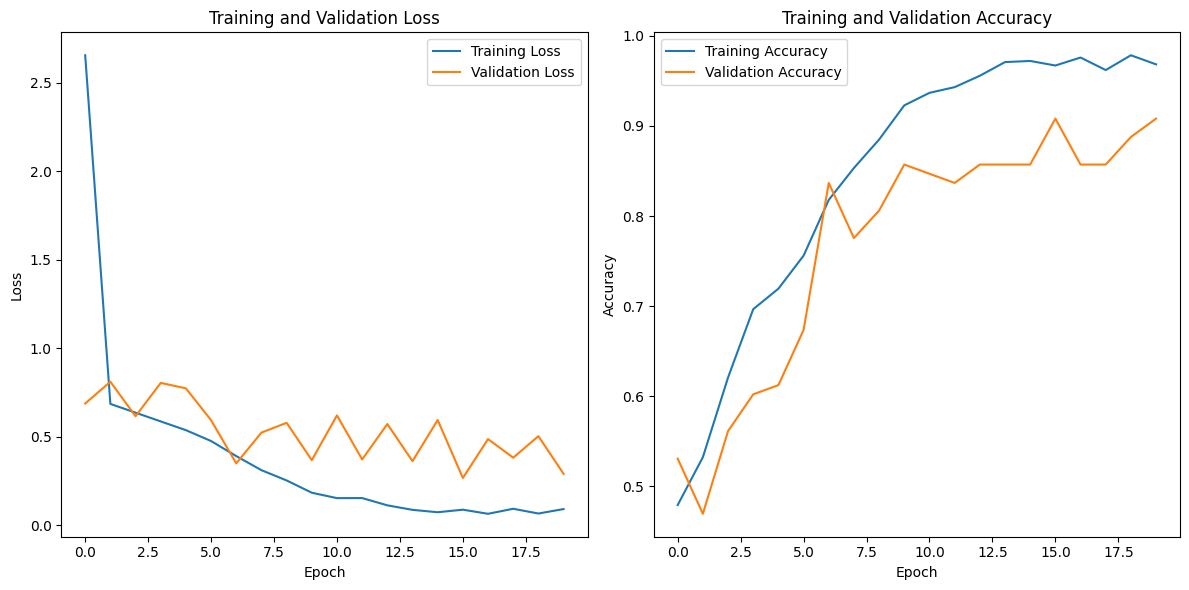

In [ ]:
import pickle
with open('cnn_training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

with open('cnn_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

Recurrent Neural Networks

In [ ]:
rnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(250, 250, 3)),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Flatten(),
        layers.Reshape((1, -1)),
        layers.LSTM(128, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(7, activation='softmax')  # 5 classes for your case
    ])

    # Compile the model with Adam optimizer
adam = optimizers.Adam(learning_rate=0.001)
rnn_model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 reshape (Reshape)           (None, 1, 254016)         0

In [ ]:

checkpoint = ModelCheckpoint("rnn_model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
rnn_history = rnn_model.fit(training_data, validation_data=validation_data, epochs = 10, callbacks=callbacks_list)


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 1.5791 - accuracy: 0.4096 
Epoch 1: val_accuracy improved from -inf to 0.55102, saving model to rnn_model_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 140s 16s/step - loss: 1.5791 - accuracy: 0.4096 - val_loss: 1.3665 - val_accuracy: 0.5510
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1.2140 - accuracy: 0.4753 
Epoch 2: val_accuracy did not improve from 0.55102
8/8 [==============================] - 124s 16s/step - loss: 1.2140 - accuracy: 0.4753 - val_loss: 1.0532 - val_accuracy: 0.5510
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.9631 - accuracy: 0.5487 
Epoch 3: val_accuracy did not improve from 0.55102
8/8 [==============================] - 126s 16s/step - loss: 0.9631 - accuracy: 0.5487 - val_loss: 0.8624 - val_accuracy: 0.5306
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.8178 - accuracy: 0.5386 
Epoch 4: val_accuracy did not improve from 0.55102
8/8 [==============================] - 117s 15s/step - loss: 0.8178 - accuracy: 0.5386 - val_loss: 0.7711 - val_accuracy: 0.5306
Epoch 5/10
8/8 [==============================] - ET

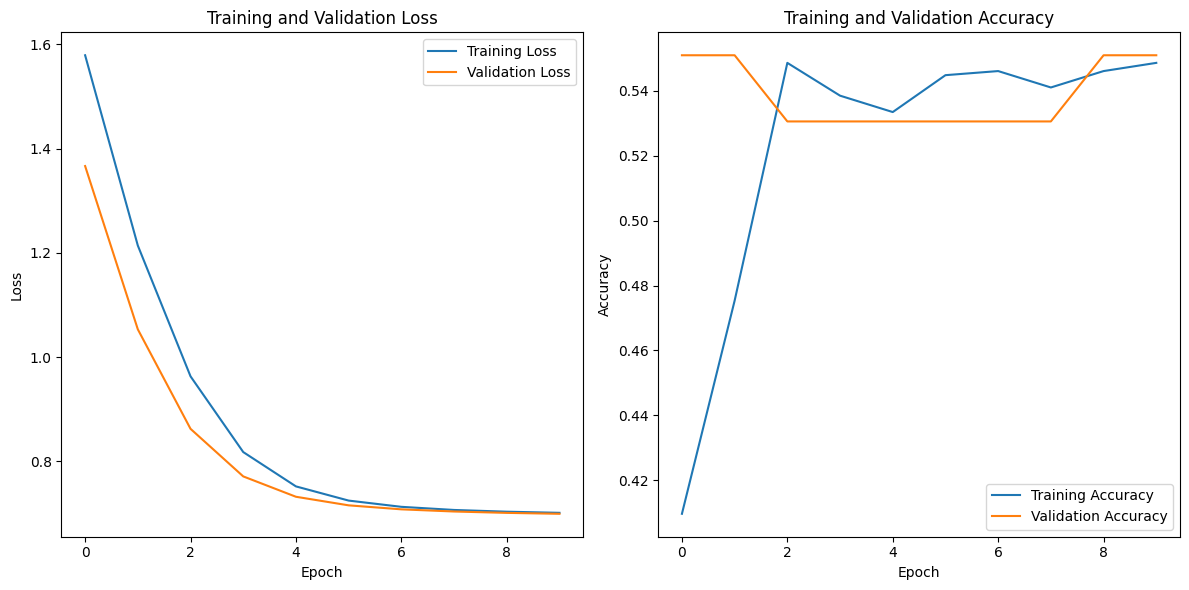

In [ ]:
import pickle
with open('rnn_training_history.pkl', 'wb') as file:
    pickle.dump(rnn_history.history, file)

with open('rnn_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = rnn_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

Long Short Term Memory

In [ ]:
def lstm(learning_rate=0.001):
    model = models.Sequential([
        layers.Reshape((1, -1), input_shape=(250, 250, 3)),
        layers.LSTM(128, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(7, activation='softmax')  # 5 classes for your case
    ])

    # Compile the model with Adam optimizer
    adam = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Print the model summary
    model.summary()
    return model
lstm=lstm(learning_rate=0.001)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 1, 187500)         0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            96066048  
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 96115911 (366.65 MB)
Trainable params: 96115911 (366.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

checkpoint = ModelCheckpoint("lstm_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
lstm_history = lstm.fit(training_data, validation_data=validation_data, epochs = 10, callbacks=callbacks_list)


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 1.6415 - accuracy: 0.4513
Epoch 1: val_accuracy improved from -inf to 0.53061, saving model to lstm_weights.h5
8/8 [==============================] - 32s 3s/step - loss: 1.6415 - accuracy: 0.4513 - val_loss: 1.4213 - val_accuracy: 0.5306
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1.2992 - accuracy: 0.5335
Epoch 2: val_accuracy did not improve from 0.53061
8/8 [==============================] - 25s 3s/step - loss: 1.2992 - accuracy: 0.5335 - val_loss: 1.1285 - val_accuracy: 0.5306
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 1.0274 - accuracy: 0.5335
Epoch 3: val_accuracy did not improve from 0.53061
8/8 [==============================] - 21s 3s/step - loss: 1.0274 - accuracy: 0.5335 - val_loss: 0.9147 - val_accuracy: 0.5306
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.8583 - accuracy: 0.5335
Epoch 4: val_accuracy did not improve from 0.53061
8/8 [========

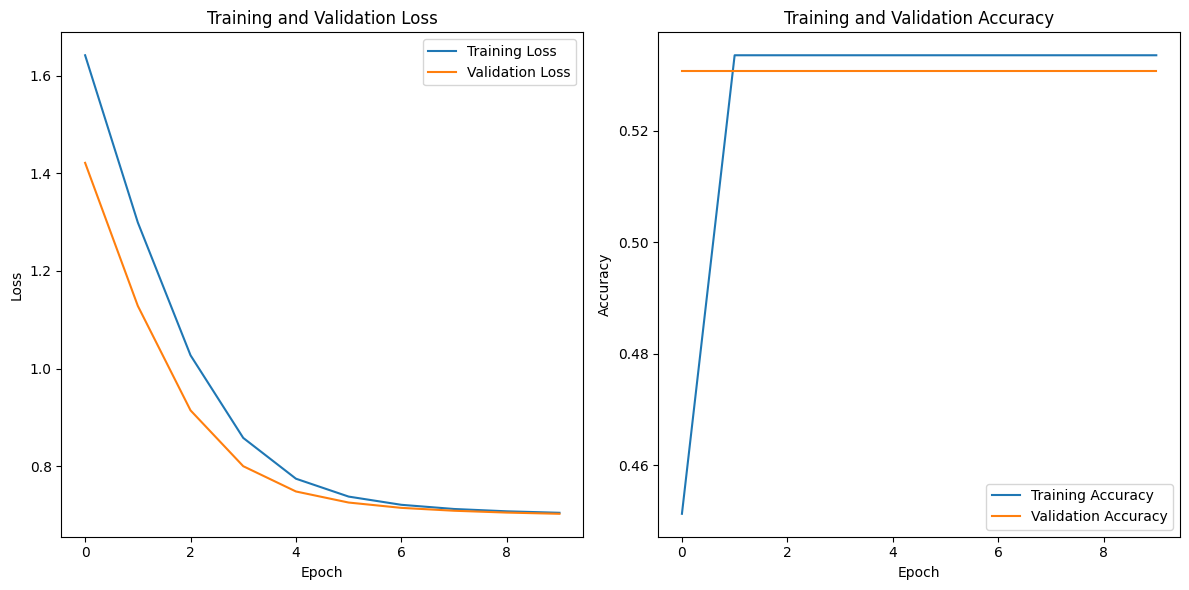

In [ ]:
import pickle
with open('lstm_training_history.pkl', 'wb') as file:
    pickle.dump(lstm_history.history, file)

with open('lstm_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = lstm.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()


**Auto Encoder**


Auto encoder is helpful to extract features from images and makes the train time less


DATA IS AUGUMENTED SEPERATELY FOR AUTO ENCODER


In [ ]:

dataset_path='/content/data'
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training dataset
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(250, 250),
    batch_size=32,
    class_mode="input",  # Set class_mode to "input" for autoencoders
    subset="training"
)

# Create validation dataset
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(250, 250),
    batch_size=32,
    class_mode="input",  # Set class_mode to "input" for autoencoders
    subset="validation"
)

for batch in train_generator:
    print("Batch Shape:", batch[0].shape)  # Check the shape of the input images
    print("Batch Labels Shape:", batch[1].shape)  # Check the shape of the labels (should match the input shape)
    break  # Print only the first batch for inspection

Found 792 images belonging to 3 classes.
Found 197 images belonging to 3 classes.
Batch Shape: (32, 250, 250, 3)
Batch Labels Shape: (32, 250, 250, 3)


In [ ]:
def create_autoencoder(input_shape=(250, 250, 3)):
    # Encoder
    input_layer = layers.Input(shape=input_shape)
    flattened_input = layers.Flatten()(input_layer)  # Flatten the image to a vector

    encoding_layer1 = layers.Dense(128, activation="relu")(flattened_input)
    encoding_layer2 = layers.Dense(64, activation="relu")(encoding_layer1)

    decoding_layer1 = layers.Dense(128, activation="relu")(encoding_layer2)
    decoding_layer2 = layers.Dense(input_shape[0] * input_shape[1] * input_shape[2], activation="sigmoid")(decoding_layer1)

    # Reshape the output back to the original image shape
    decoded_output = layers.Reshape(input_shape)(decoding_layer2)

    autoencoder = keras.Model(inputs=input_layer, outputs=decoded_output)
    autoencoder.summary()
    autoencoder.compile(loss="mean_squared_error", optimizer="RMSprop",metrics='accuracy')

    return autoencoder

autoencoder=create_autoencoder(input_shape=(250, 250, 3))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 187500)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               24000128  
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 187500)            24187500  
                                                                 
 reshape_2 (Reshape)         (None, 250, 250, 3)       0     

In [ ]:
checkpoint = ModelCheckpoint("autoencoder.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
ae_history = autoencoder.fit(train_generator,validation_data=validation_generator ,epochs=10,callbacks=callbacks_list)

Epoch 1/10
25/25 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.3340
Epoch 1: val_accuracy improved from -inf to 0.33364, saving model to autoencoder.h5
25/25 [==============================] - 52s 2s/step - loss: 0.0487 - accuracy: 0.3340 - val_loss: 0.0466 - val_accuracy: 0.3336
Epoch 2/10
25/25 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.3340
Epoch 2: val_accuracy improved from 0.33364 to 0.33396, saving model to autoencoder.h5
25/25 [==============================] - 48s 2s/step - loss: 0.0487 - accuracy: 0.3340 - val_loss: 0.0466 - val_accuracy: 0.3340
Epoch 3/10
25/25 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.3340
Epoch 3: val_accuracy improved from 0.33396 to 0.33411, saving model to autoencoder.h5
25/25 [==============================] - 42s 2s/step - loss: 0.0487 - accuracy: 0.3340 - val_loss: 0.0466 - val_accuracy: 0.3341
Epoch 4/10
25/25 [==============================] - ETA: 0s - loss: 0.048

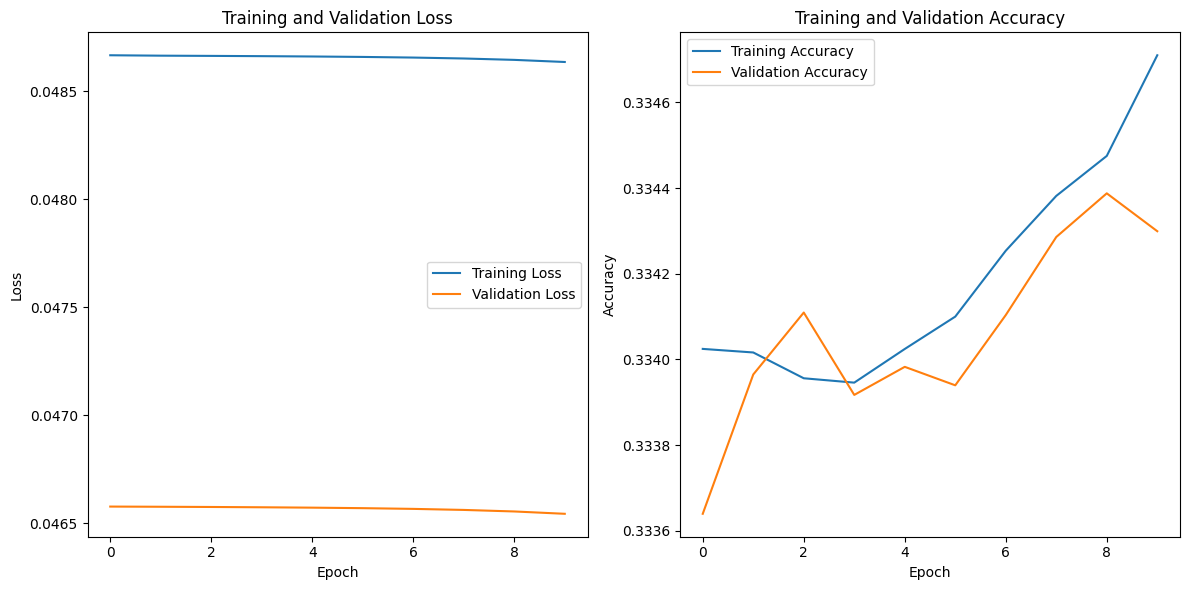

In [ ]:
import pickle
with open('ae_training_history.pkl', 'wb') as file:
    pickle.dump(ae_history.history, file)

with open('ae_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Bidirectional LSTM

In [ ]:
def bidirectionallstm(num_classes):
    model = models.Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(tf.keras.layers.Reshape((1, -1)))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    return model
num_classes=2
bilstm=bidirectionallstm(num_classes)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 29, 29, 128)      

In [ ]:
checkpoint = ModelCheckpoint("bilstm.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
bilstm_history = bilstm.fit(training_data,validation_data=validation_data,epochs=10,callbacks=callbacks_list)

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 0.7134 - accuracy: 0.5007 
Epoch 1: val_accuracy improved from -inf to 0.53061, saving model to bilstm.h5
8/8 [==============================] - 153s 18s/step - loss: 0.7134 - accuracy: 0.5007 - val_loss: 0.6997 - val_accuracy: 0.5306
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.5340 
Epoch 2: val_accuracy did not improve from 0.53061
8/8 [==============================] - 128s 16s/step - loss: 0.6962 - accuracy: 0.5340 - val_loss: 0.6925 - val_accuracy: 0.5306
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.4583 
Epoch 3: val_accuracy did not improve from 0.53061
8/8 [==============================] - 129s 16s/step - loss: 0.6949 - accuracy: 0.4583 - val_loss: 0.6930 - val_accuracy: 0.5306
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5340 
Epoch 4: val_accuracy did not improve from 0.53061
8/8 [====

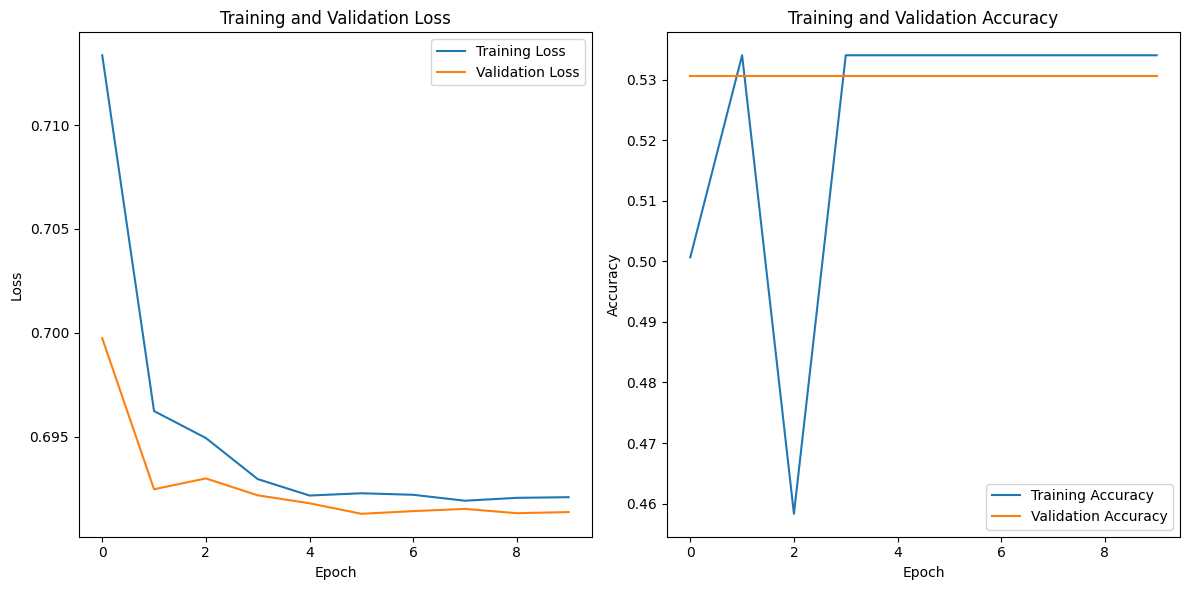

In [ ]:

import pickle
with open('bilstm_training_history.pkl', 'wb') as file:
    pickle.dump(bilstm_history.history, file)

with open('bilstm_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = bilstm.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

# Transfer Learning Models


VGG 16

In [ ]:

from keras.applications.vgg16 import VGG16

In [ ]:
vgg = VGG16(input_shape=[250,250]+ [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
vgg16_model = keras.Sequential([
  vgg,
  layers.Flatten(),
  layers.Dense(2, activation='relu'),
  layers.Dense(1, activation='sigmoid')])
vgg16_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics = ["accuracy"]
)
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 14764869 (56.32 MB)
Trainable params: 50181 (196.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
history =vgg16_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=5,
)


Epoch 1/5
8/8 [==============================] - 706s 89s/step - loss: 0.9061 - accuracy: 0.4576 - val_loss: 0.6932 - val_accuracy: 0.4694
Epoch 2/5
8/8 [==============================] - 684s 87s/step - loss: 0.6932 - accuracy: 0.4665 - val_loss: 0.6931 - val_accuracy: 0.5306
Epoch 3/5
8/8 [==============================] - 685s 87s/step - loss: 0.6931 - accuracy: 0.5335 - val_loss: 0.6931 - val_accuracy: 0.5306
Epoch 4/5
8/8 [==============================] - 685s 87s/step - loss: 0.6930 - accuracy: 0.5335 - val_loss: 0.6930 - val_accuracy: 0.5306
Epoch 5/5
8/8 [==============================] - 751s 95s/step - loss: 0.6929 - accuracy: 0.5335 - val_loss: 0.6929 - val_accuracy: 0.5306


NameError: name 'pickle' is not defined

In [ ]:
with open('vgg16_training_history.pkl', 'wb') as file:
    pkl.dump(history.history, file)


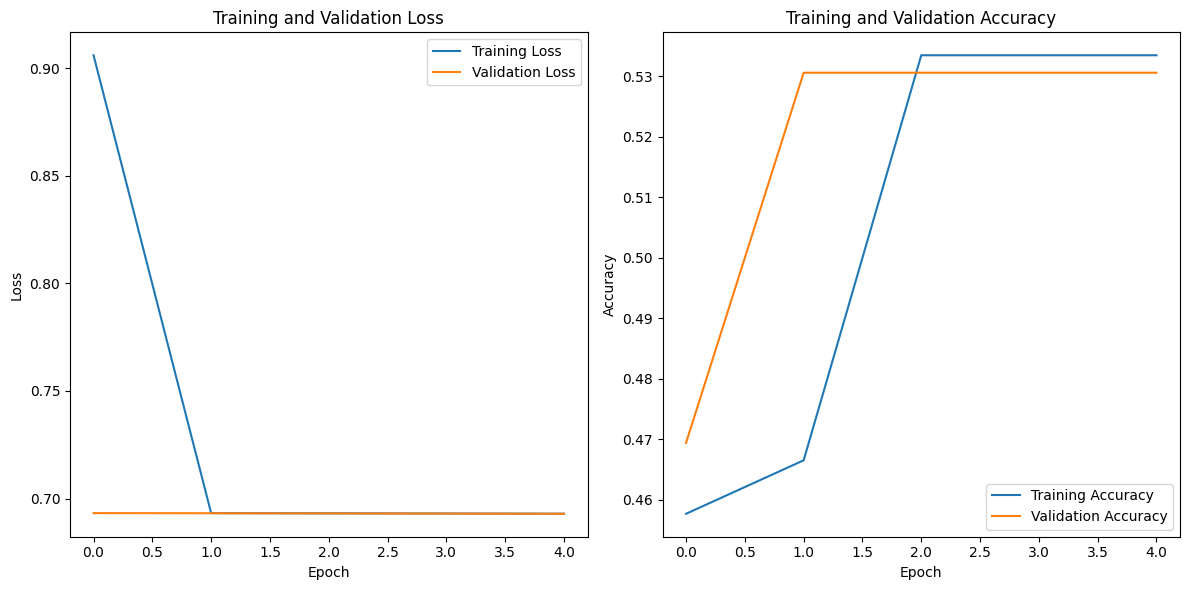

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('vgg16_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = vgg16_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

VGG 19

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [ ]:
vgg = VGG19(input_shape=[250,250]+ [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
vgg19_model = keras.Sequential([
  vgg,
  layers.Flatten(),
  layers.Dense(2, activation='relu'),
  layers.Dense(1, activation='sigmoid')])
vgg19_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics = ["accuracy"]
)
vgg19_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20074565 (76.58 MB)
Trainable params: 50181 (196.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
history =vgg19_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=10,
)
with open('vgg19_training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


Epoch 1/10
8/8 [==============================] - 556s 71s/step - loss: 0.8968 - accuracy: 0.4716 - val_loss: 0.6932 - val_accuracy: 0.4694
Epoch 2/10
8/8 [==============================] - 520s 66s/step - loss: 0.6932 - accuracy: 0.4665 - val_loss: 0.6932 - val_accuracy: 0.4694
Epoch 3/10
8/8 [==============================] - 540s 69s/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5306
Epoch 4/10
8/8 [==============================] - 539s 69s/step - loss: 0.6931 - accuracy: 0.5335 - val_loss: 0.6930 - val_accuracy: 0.5306
Epoch 5/10
8/8 [==============================] - 547s 70s/step - loss: 0.6930 - accuracy: 0.5335 - val_loss: 0.6929 - val_accuracy: 0.5306
Epoch 6/10
8/8 [==============================] - 515s 65s/step - loss: 0.6929 - accuracy: 0.5335 - val_loss: 0.6929 - val_accuracy: 0.5306
Epoch 7/10
8/8 [==============================] - 540s 69s/step - loss: 0.6928 - accuracy: 0.5335 - val_loss: 0.6928 - val_accuracy: 0.5306
Epoch 8/10
8/8 [====

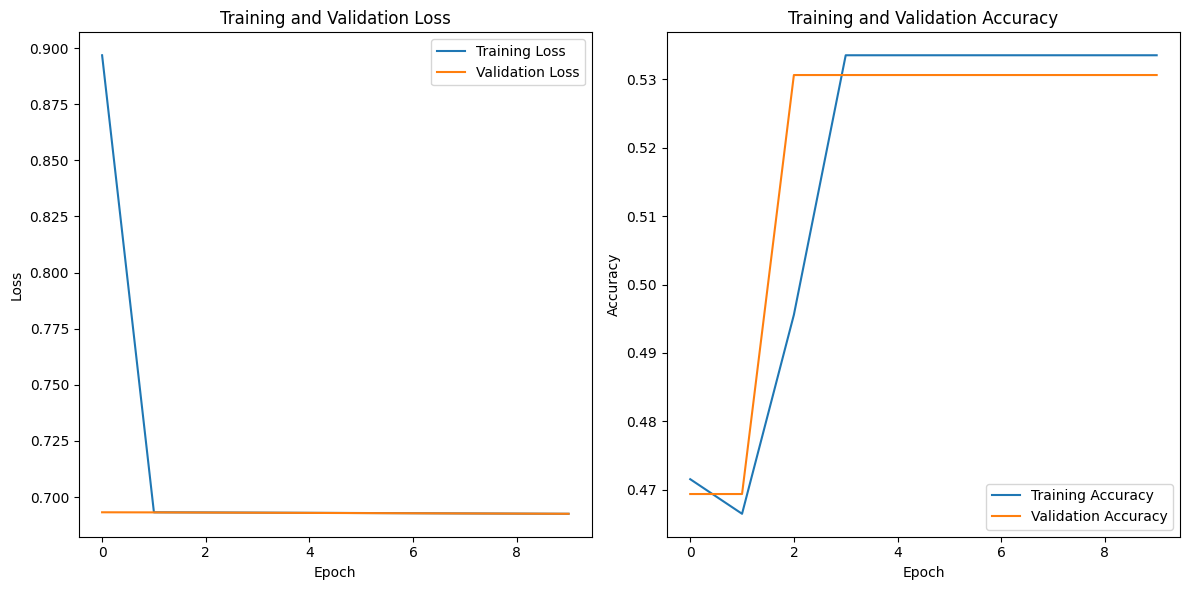

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('vgg19_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = vgg19_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

INCEPTION v3

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(250,250, 3))
for layer in base_model.layers:
    layer.trainable = False
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='softmax')(x)  # Assuming you have 10 classes, adjust as needed

# Create the model
inv3_model = models.Model(inputs=base_model.input, outputs=x)

# Compile the model
inv3_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
inv3_model.summary()

In [ ]:
history =inv3_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=10,
)
with open('inv3_model_training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


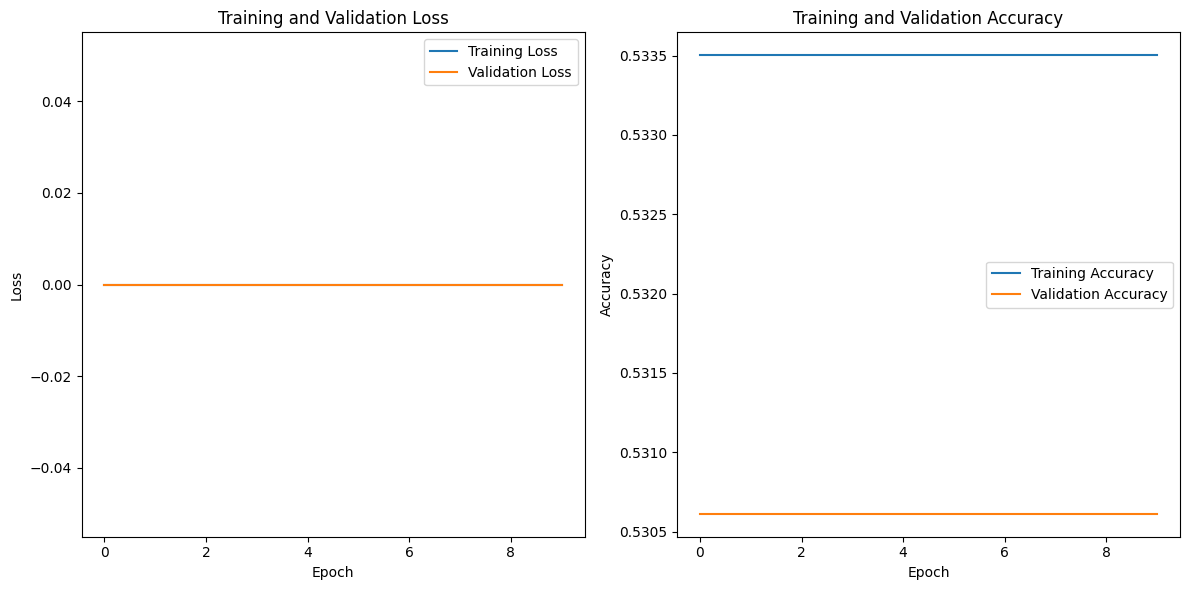

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('inv3_model_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = inv3_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

Xception

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(250,250, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='softmax')(x)

# Create the model
Xception_model = models.Model(inputs=base_model.input, outputs=predictions)
Xception_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
Xception_model.summary()

In [ ]:
history =Xception_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=10,
)
with open('Xception_model_training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


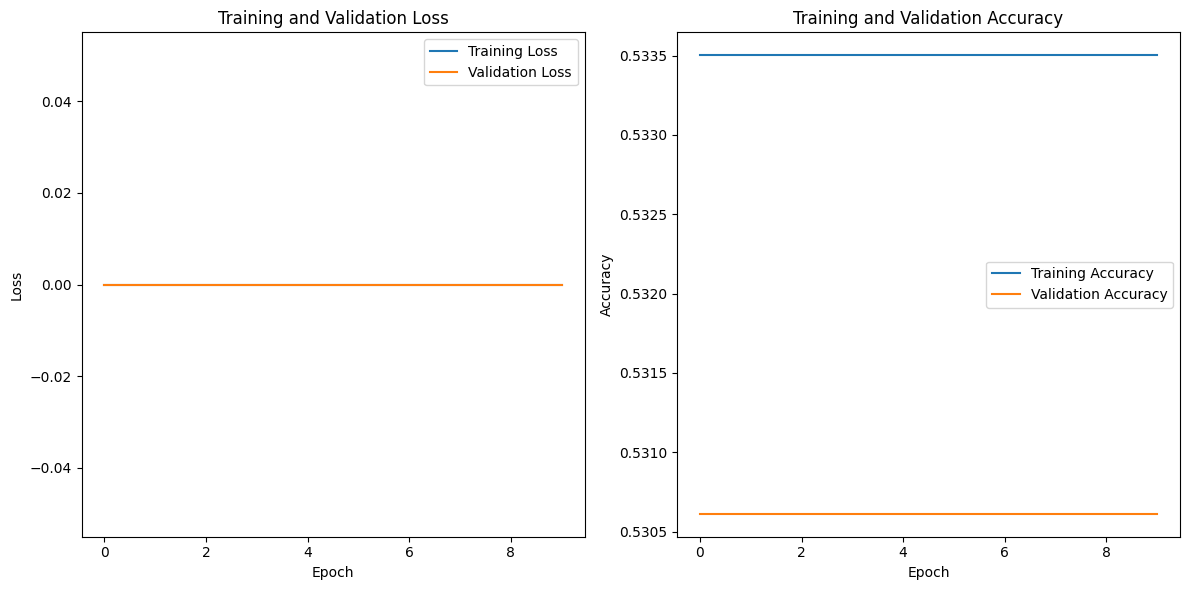

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('Xception_model_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = Xception_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

Resnet

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(250,250, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='softmax')(x)

# Create the model
resnet_model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
resnet_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

In [ ]:
history =resnet_model.fit(
    training_data,
    validation_data= validation_data,
    epochs=10,
)


In [ ]:
import pickle
with open('resnet_training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


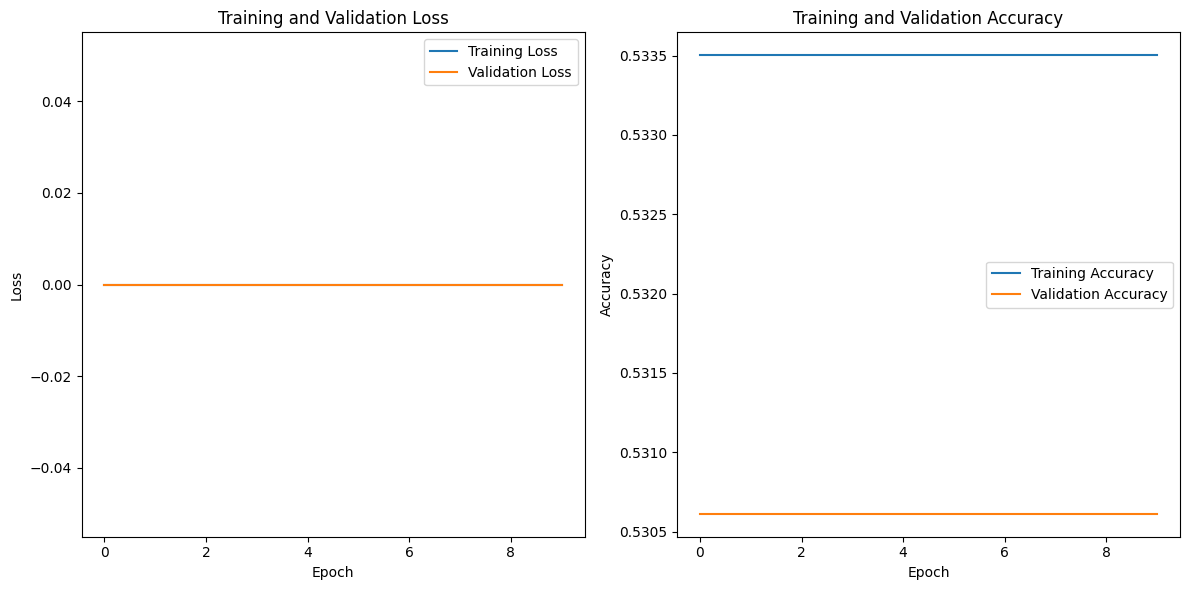

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('resnet_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = resnet_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='softmax')(x)

densenet_model = models.Model(inputs=base_model.input, outputs=predictions)

densenet_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

densenet_model.summary()

In [ ]:
history = densenet_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=10,
)

with open('densenet_training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

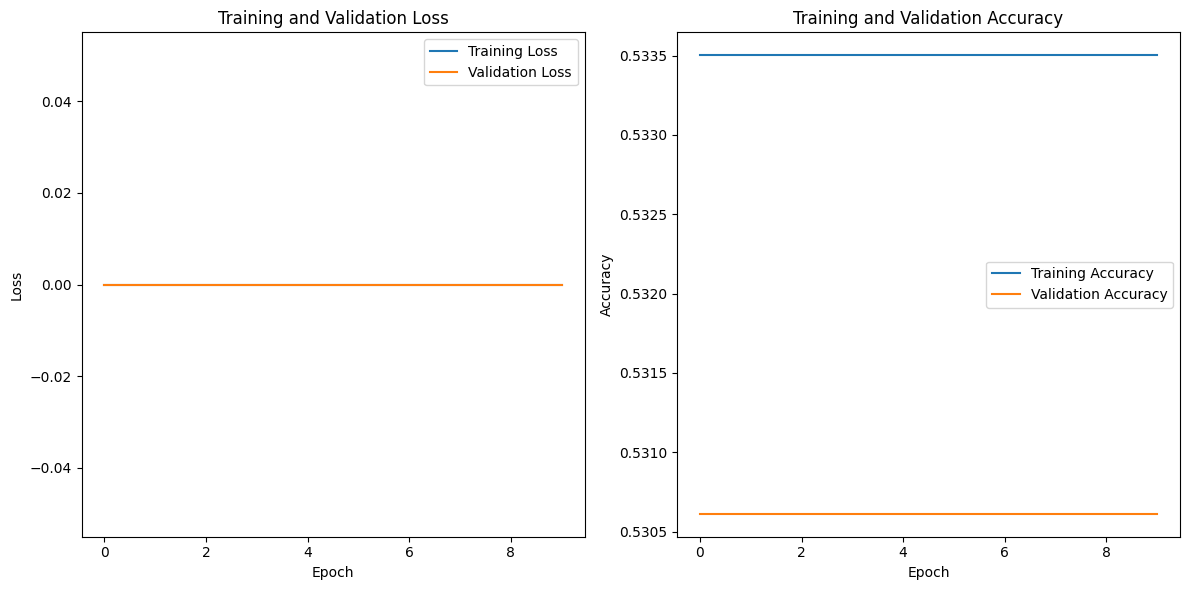

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('densenet_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = densenet_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

AlexNet

In [ ]:


from tensorflow.keras import layers, models, optimizers
import pickle

In [ ]:
def alexnet_model(input_shape=(250, 250, 3), num_classes=1):
    model = models.Sequential()

    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(layers.Conv2D(256, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Assuming binary classification (num_classes=1)
alexnet_model = alexnet_model()

# Compile the model
alexnet_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

alexnet_model.summary()

In [ ]:
history_alexnet = alexnet_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=10,
)

with open('alexnet_training_history.pkl', 'wb') as file:
    pickle.dump(history_alexnet.history, file)

Epoch 1/10
8/8 [==============================] - 55s 7s/step - loss: 0.0000e+00 - accuracy: 0.5335 - val_loss: 0.0000e+00 - val_accuracy: 0.5306
Epoch 2/10
8/8 [==============================] - 52s 7s/step - loss: 0.0000e+00 - accuracy: 0.5335 - val_loss: 0.0000e+00 - val_accuracy: 0.5306
Epoch 3/10
8/8 [==============================] - 53s 7s/step - loss: 0.0000e+00 - accuracy: 0.5335 - val_loss: 0.0000e+00 - val_accuracy: 0.5306
Epoch 4/10
8/8 [==============================] - 52s 7s/step - loss: 0.0000e+00 - accuracy: 0.5335 - val_loss: 0.0000e+00 - val_accuracy: 0.5306
Epoch 5/10
8/8 [==============================] - 52s 6s/step - loss: 0.0000e+00 - accuracy: 0.5335 - val_loss: 0.0000e+00 - val_accuracy: 0.5306
Epoch 6/10
8/8 [==============================] - 52s 7s/step - loss: 0.0000e+00 - accuracy: 0.5335 - val_loss: 0.0000e+00 - val_accuracy: 0.5306
Epoch 7/10
8/8 [==============================] - 51s 6s/step - loss: 0.0000e+00 - accuracy: 0.5335 - val_loss: 0.0000e+00 -

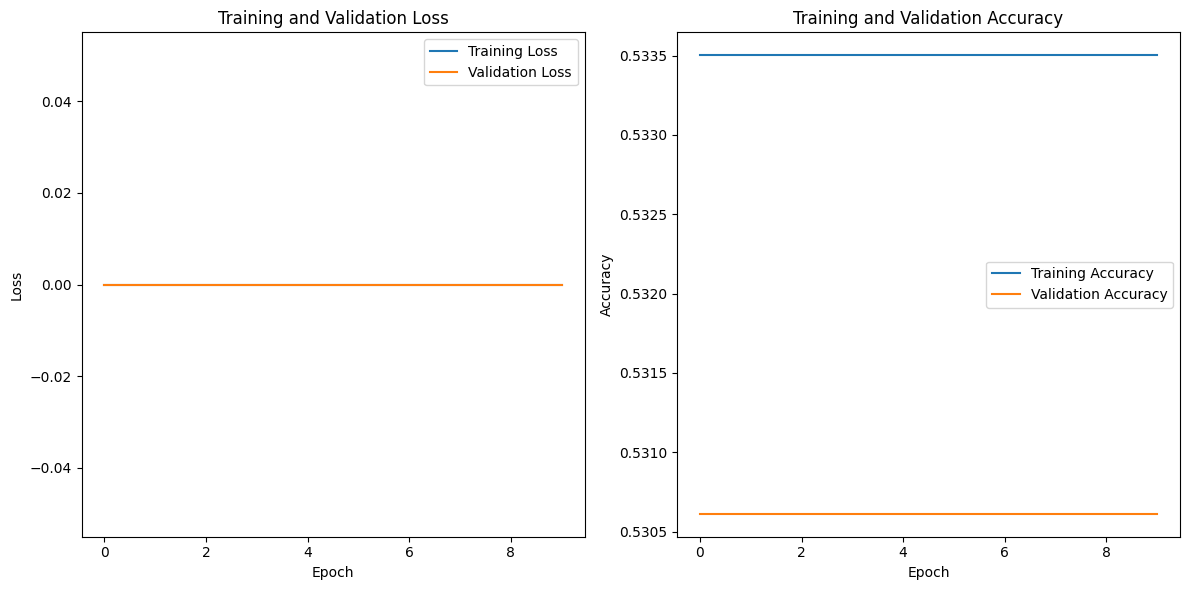

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('alexnet_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = alexnet_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

MobileNet and EfficientNet

In [ ]:
from tensorflow.keras.applications import  MobileNet, EfficientNetB0
from tensorflow.keras import layers, models, optimizers
import pickle



In [ ]:


# MobileNet
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

# EfficientNet
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

# Freeze the layers
for model in [alexnet_model, mobilenet_model, efficientnet_model]:
    for layer in model.layers:
        layer.trainable = False

# Add custom classification head
for model, model_name in zip([ mobilenet_model, efficientnet_model], [ 'mobilenet', 'efficientnet']):
    x = layers.GlobalAveragePooling2D()(model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(1, activation='softmax')(x)

    custom_model = models.Model(inputs=model.input, outputs=predictions)

    custom_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    custom_model.summary()

    history = custom_model.fit(
        training_data,
        validation_data=validation_data,
        epochs=5,
    )

    with open(f'{model_name}_training_history.pkl', 'wb') as file:
        pickle.dump(history.history, file)


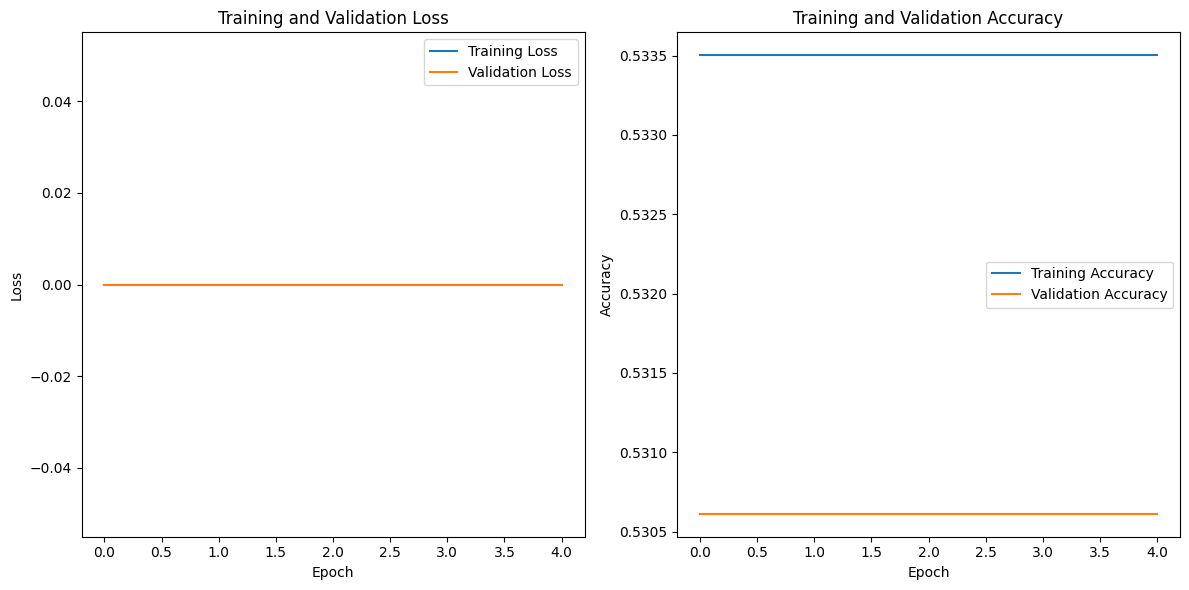

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('mobilenet_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

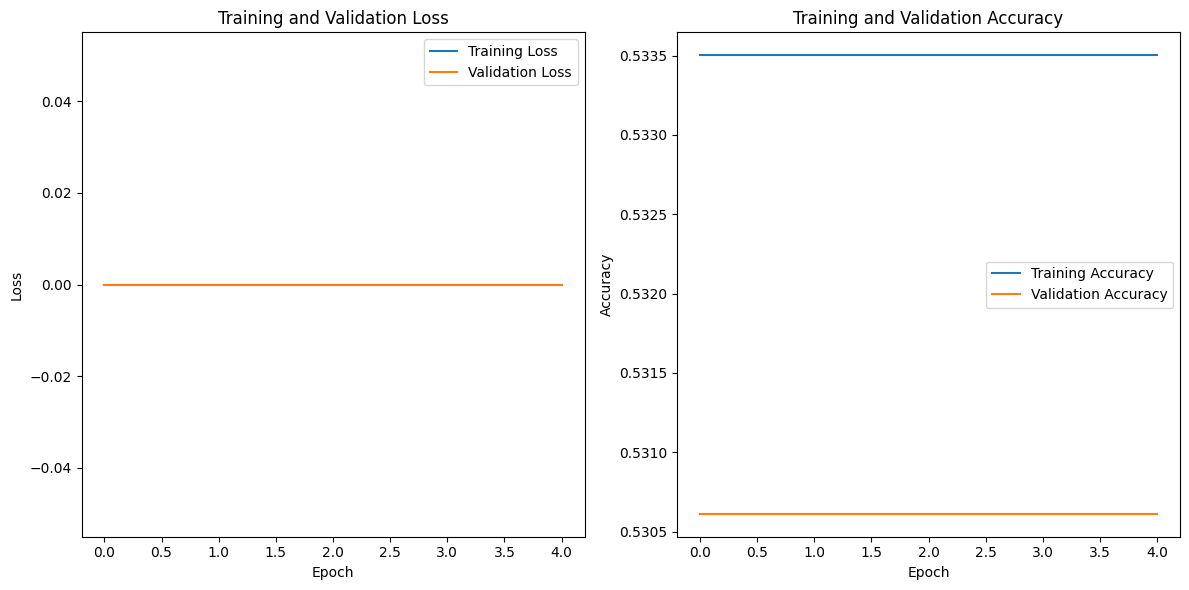

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('efficientnet_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = mobilenet_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = efficientnet_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

BIG TRANSFER

In [ ]:
import tensorflow_hub as hub

In [ ]:
# BigTransfer (BiT)
bit_model_url = "https://tfhub.dev/google/bit/m-r50x3/ilsvrc2012_classification/1"
bit_model = hub.KerasLayer(bit_model_url)

# Create a Sequential model and add the BiT layer
bit_custom_model = models.Sequential([
    bit_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Build the model
bit_custom_model.build((None, 250, 250, 3))

# Compile the model
bit_custom_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
bit_custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              217319080 
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 256)               256256    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 217575593 (829.99 MB)
Trainable params: 256513 (1002.00 KB)
Non-trainable params: 217319080 (829.01 MB)
_________________________________________________________________


In [ ]:
history_bit = bit_custom_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=1,
)



In [ ]:
import pickle
with open('bit_training_history.pkl', 'wb') as file:
    pickle.dump(history_bit.history, file)

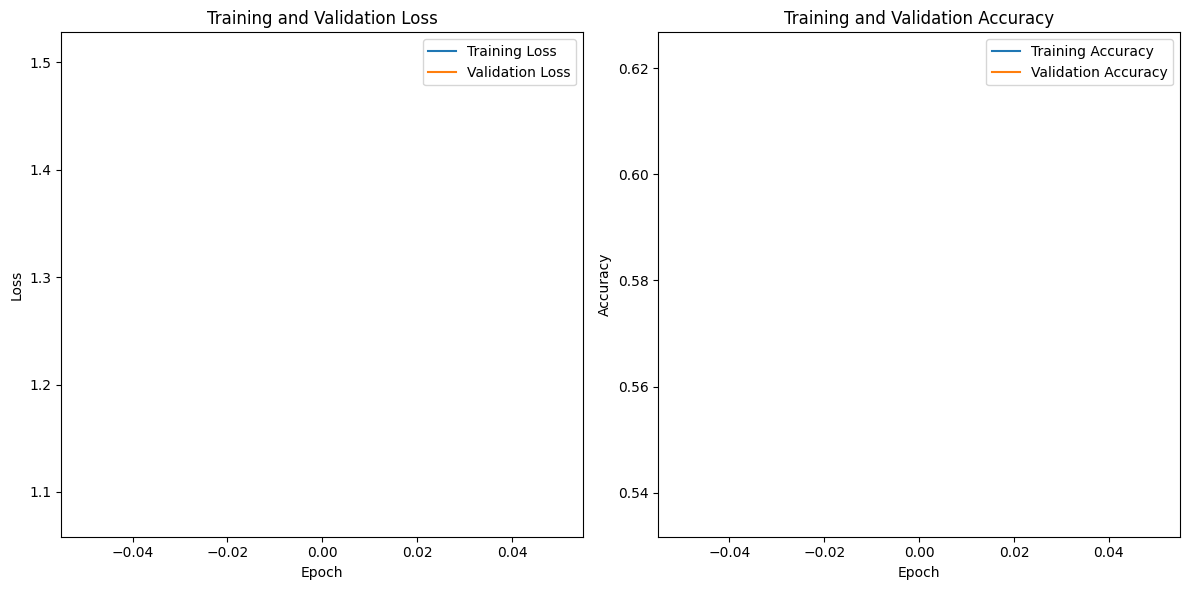

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('bit_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = bit_custom_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()

SlowFast Temporal Difference Transformer

In [ ]:
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import tensorflow_hub as hub

In [ ]:

# Load the BigTransfer (BiT) model from TensorFlow Hub
bit_model_url = "https://tfhub.dev/google/bit/m-r50x3/ilsvrc2012_classification/1"
bit_model = tf.keras.Sequential([hub.KerasLayer(bit_model_url, trainable=False)])
input_shape = (None, 250, 250, 3)
slow_pathway = tf.keras.Sequential([
    layers.TimeDistributed(bit_model, input_shape=input_shape),
    layers.GlobalAveragePooling2D(),
])
fast_pathway = tf.keras.Sequential([
    layers.TimeDistributed(bit_model, input_shape=input_shape),
    layers.GlobalAveragePooling2D(),
])
concatenated = layers.Concatenate()([slow_pathway.output, fast_pathway.output])


x = layers.Dense(256, activation='relu')(concatenated)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(num_classes, activation='softmax')(x)
slowfast_model = models.Model(inputs=[slow_pathway.input, fast_pathway.input], outputs=output_layer)
slowfast_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
slowfast_model.summary()

In [ ]:
# Assuming you have training and validation data
history_slowfast = slowfast_model.fit(
    [video_training_data_slow, video_training_data_fast],  # Replace with your video dataset
    validation_data=([video_validation_data_slow, video_validation_data_fast],),  # Replace with your video validation dataset
    epochs=10,
)

# Save training history
with open('slowfast_training_history.pkl', 'wb') as file:
    pickle.dump(history_slowfast.history, file)

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('slowfast_training_history.pkl', 'rb') as file:
  loaded_history = pickle.load(file)

# Access the metrics from the loaded history
loss = loaded_history['loss']
accuracy = loaded_history['accuracy']
val_loss = loaded_history['val_loss']
val_accuracy = loaded_history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = slowfast_model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9, bottom=0.1)
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl:' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
    plt.show()
